In [3]:
from scipy.stats import expon
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd
from scipy.stats import norm
from dendropy.simulate import treesim
from scipy.stats import dirichlet
import numpy as np

Import required packages.


Then, plot a exponential distributions, density shown, and the histogram under the density function colored by value so it's easier to see the same rates on the tree.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


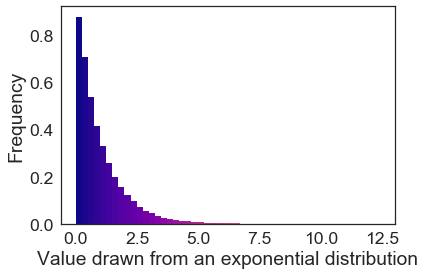

In [107]:
df = pd.DataFrame(columns = ["data_expon","data_expon1","data_expon2", "data_lognorm", "data_lognorm1","data_lognorm2"])
sns.set(font_scale=1.75)
sns.set_style("white")
df.data_expon = expon.rvs(scale=1,loc=0,size=100000)

cm = plt.cm.get_cmap('plasma')


n, bins, patches = plt.hist(df.data_expon, 50, normed=1, color='green')
bin_centers = 0.25 * (bins[:-1] + bins[1:])

columns = bin_centers - min(bin_centers)
columns /= max(columns)

for c, p in zip(columns, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlabel('Value drawn from an exponential distribution')
plt.ylabel('Frequency')

plt.savefig("expon.pdf", bbox_inches='tight')


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


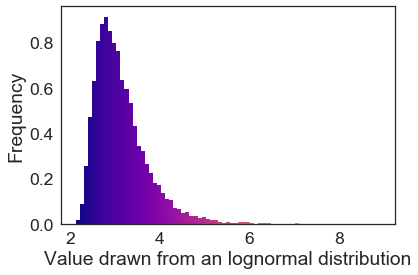

In [103]:
sns.set(font_scale=1.75)
sns.set_style("white")

cm = plt.cm.get_cmap('plasma')

df_lognomal = pd.DataFrame(columns=["lognormal"])
df_lognomal["lognormal"] = lognorm.rvs(.5, loc=2,size=10000)


n, bins, patches = plt.hist(df_lognomal["lognormal"], 75, normed=1, color='green')
bin_centers = 0.25 * (bins[:-1] + bins[1:])

columns = bin_centers - min(bin_centers)
columns /= max(columns)

for c, p in zip(columns, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlabel('Value drawn from an lognormal distribution')
plt.ylabel('Frequency')

plt.savefig("lognorm.png", bbox_inches='tight')

In [105]:
#t = treesim.birth_death_tree(birth_rate=1.0, death_rate=0.5, num_extant_tips=10)
import dendropy
t = dendropy.Tree.get_from_path("expon_tree.tre", schema = "nexus")
for node in t.postorder_node_iter():
    node.expon_clock_draw = None
    node.annotations.add_bound_attribute("expon_clock_draw")


def evolve_char(tree, start=1.0):
    for node in t.preorder_node_iter():
        if node.parent_node is None:
            node.expon_clock_draw = 1.0
        else:
#            node.expon_clock_draw = expon.rvs(scale=node.parent_node.expon_clock_draw,loc=node.edge.length,size=1)
            node.expon_clock_draw = expon.rvs(scale=1,loc=0,size=1)
    
    return(t)


In [106]:
evolve_char(t, start=1.0)

t.write_to_path("expon_uncorr.tre", schema="nexus", suppress_leaf_node_labels=False)

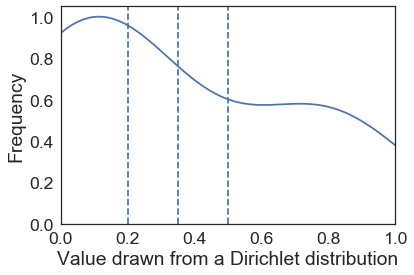

In [113]:
#quantiles = np.array([1, 1, 1])
sns.set(font_scale=1.75)
sns.set_style("white")
alpha = np.array([1,1.2,1])
dir_samp = dirichlet.rvs(alpha, size=1)


ax3 =  sns.distplot(dir_samp, hist=None)
ax3.axvline(0.2, linestyle = '--')
ax3.axvline(.35,  linestyle = '--')
ax3.axvline(.5, linestyle = '--')
fig = ax3.get_figure()
ax3.set(xlabel='Value drawn from a Dirichlet distribution', ylabel='Frequency')
ax3.set_xlim([0,1], None)


fig.savefig("dir.png", bbox_inches='tight')